# Iris Species

About this Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. <br>

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.<br>

The columns in this dataset are:<br>

* Id<br>
* SepalLengthCm<br>
* SepalWidthCm<br>
* PetalLengthCm<br>
* PetalWidthCm<br>
* Species<br>

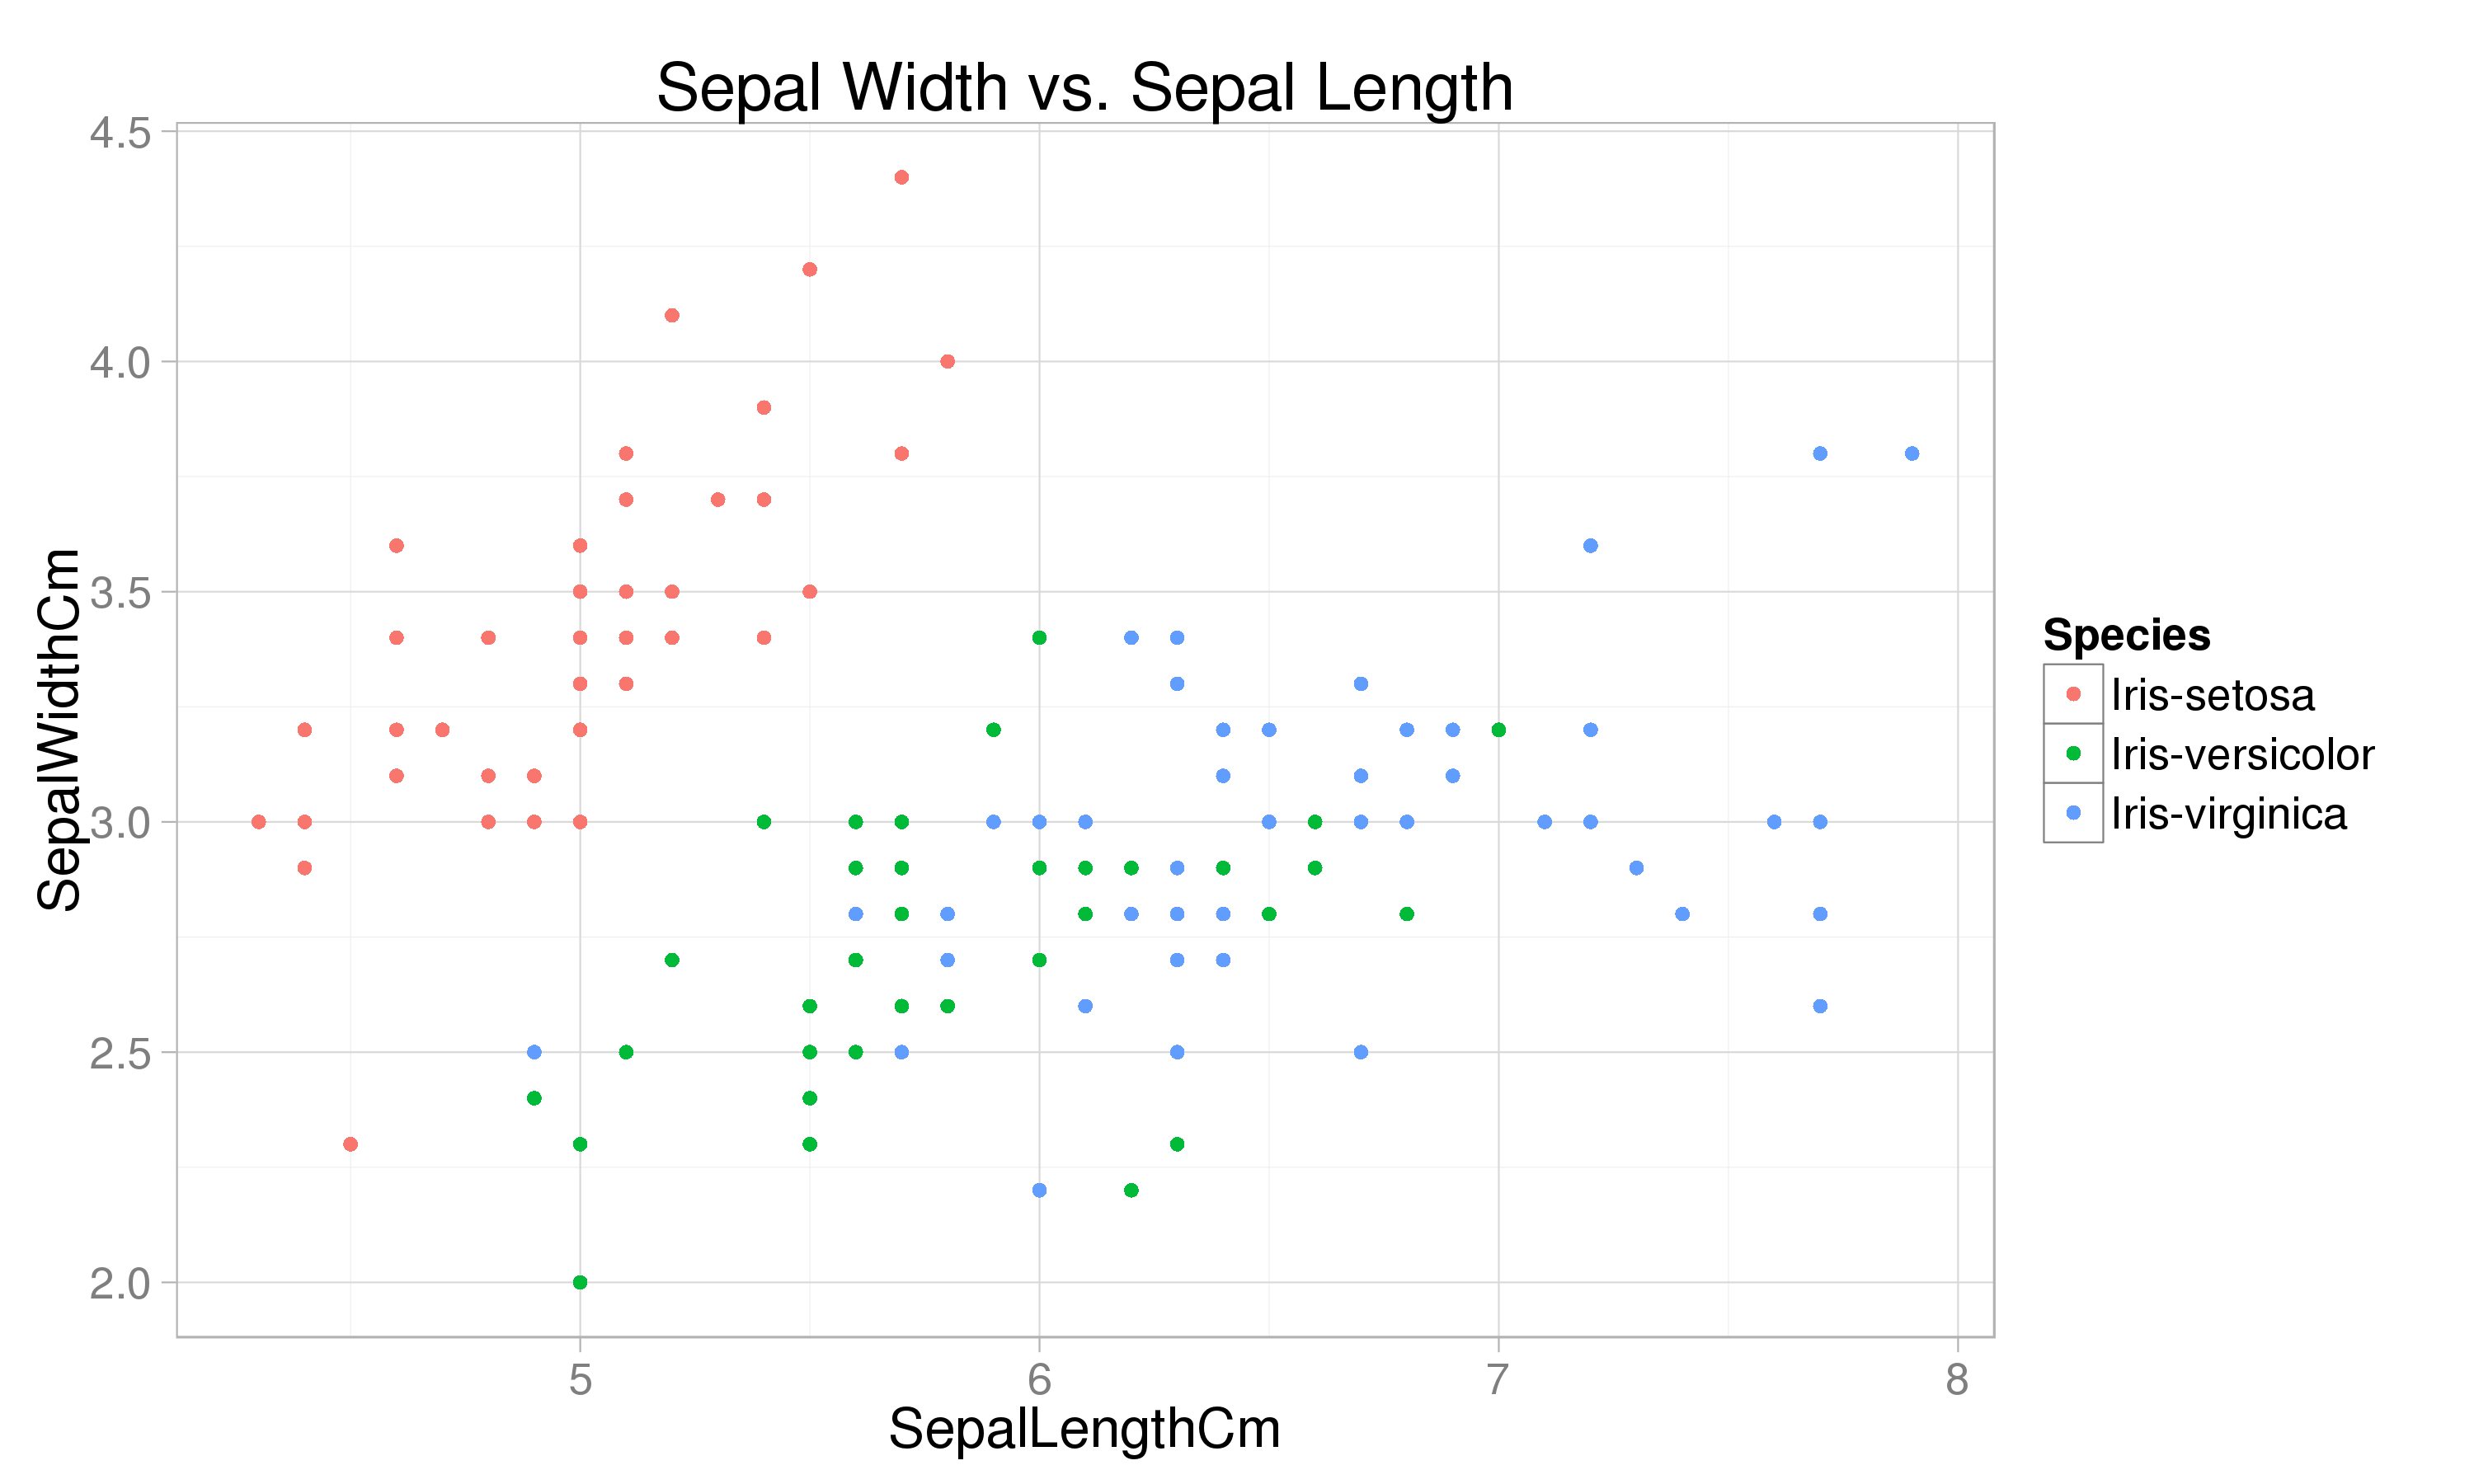

In [1]:
from IPython.display import Image
Image(filename='sepalWidthvsLength.png') 

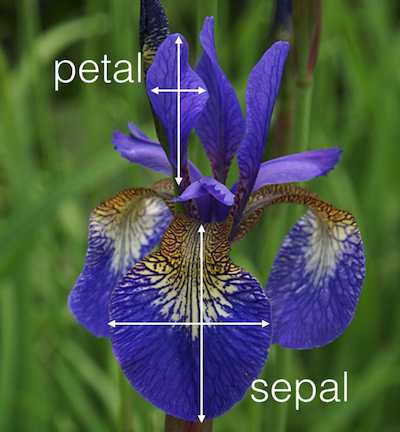

In [10]:
from IPython.display import Image
Image(filename='Sepal Petal.png') 

# Content

1. Import libraries<br>
2. Plot<br>
3. Observation<br>


## 1. Import Libraries

In [2]:
# data analysis libraries
import numpy as np
import pandas as pd
#visualization
import seaborn as sns
sns.set(style = "white", color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline
# The output plotting commands will be displayed inline within frontends directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Explore Data

In [3]:
# read the data as pandas DataFrame
iris = pd.read_csv('D:\My Documents\Data Science Personal Projects\Iris Species Classification\Iris.csv')

In [4]:
# take a look at summary
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#List of features
features_list = iris.columns
print(features_list)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
# count the sample of each of the 3 species
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## 3. Exploratory Plot

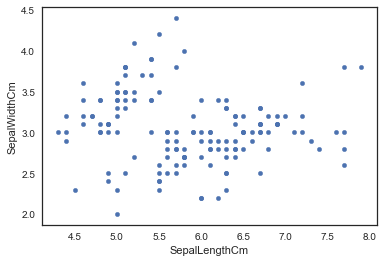

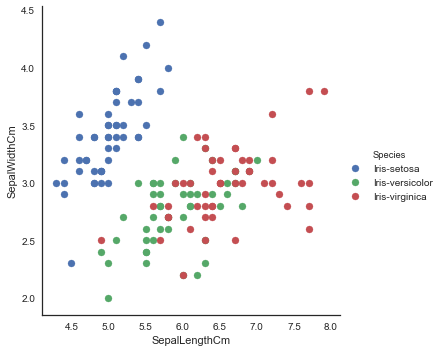

In [9]:
# We use plot method of Pandas to see all data in one plot. Style is scatterplot.
iris.plot(kind="scatter", x = "SepalLengthCm", y = "SepalWidthCm")
# Use FacetGrid to color scatterplot by species
sns.FacetGrid(iris, hue ="Species", size = 5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

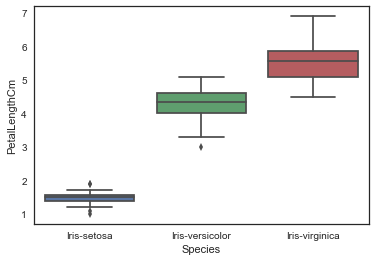

In [11]:
# Plot Petal length differences on a boxplot
sns.boxplot(x="Species", y = "PetalLengthCm", data = iris)

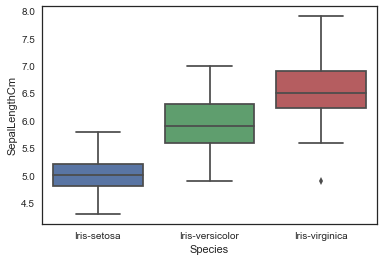

In [12]:
# Plot Sepal length differences on a boxplot
sns.boxplot(x="Species", y = "SepalLengthCm", data = iris)

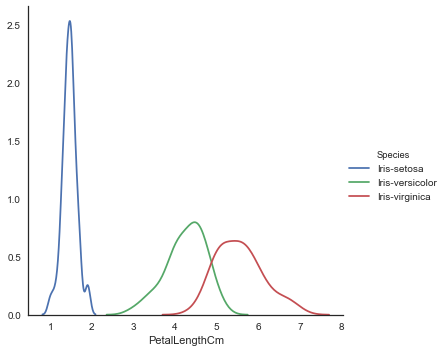

In [14]:
# Using KDEplot to look at univariate relations, which visualizes kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue = "Species", size = 5).map(sns.kdeplot, "PetalLengthCm").add_legend()

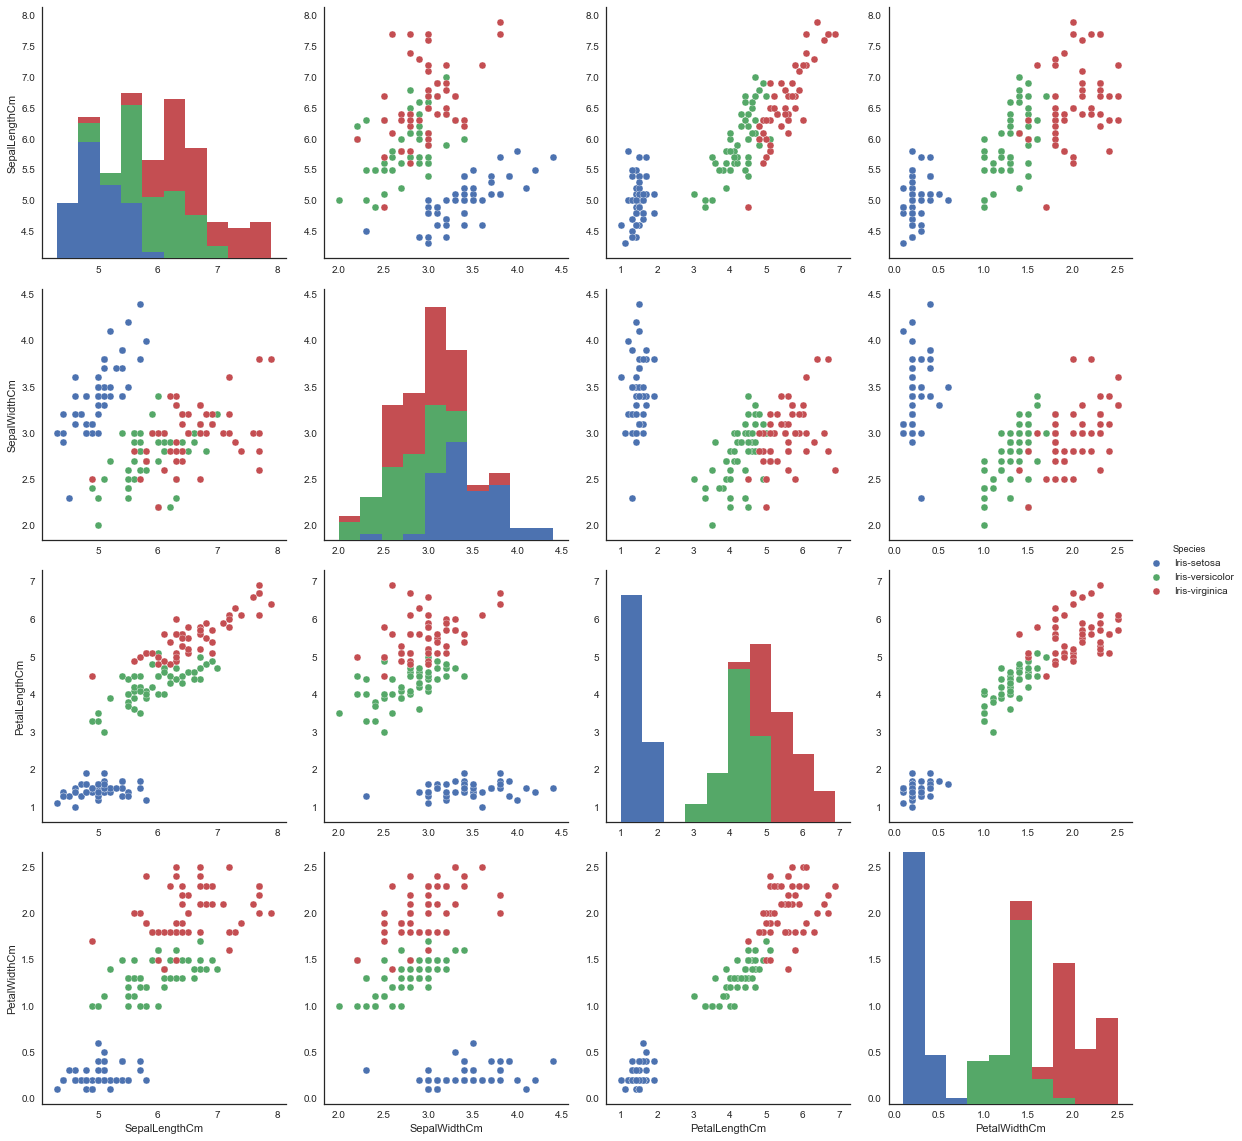

In [16]:
# To have the most comprehensive view of the differences accross 4 features we can use pairplot, which shows bivariate relationship between each pair
sns.pairplot(iris.drop("Id", axis = 1), hue = "Species", size = 4)

The diagonal elements in pairplot show histogram by default

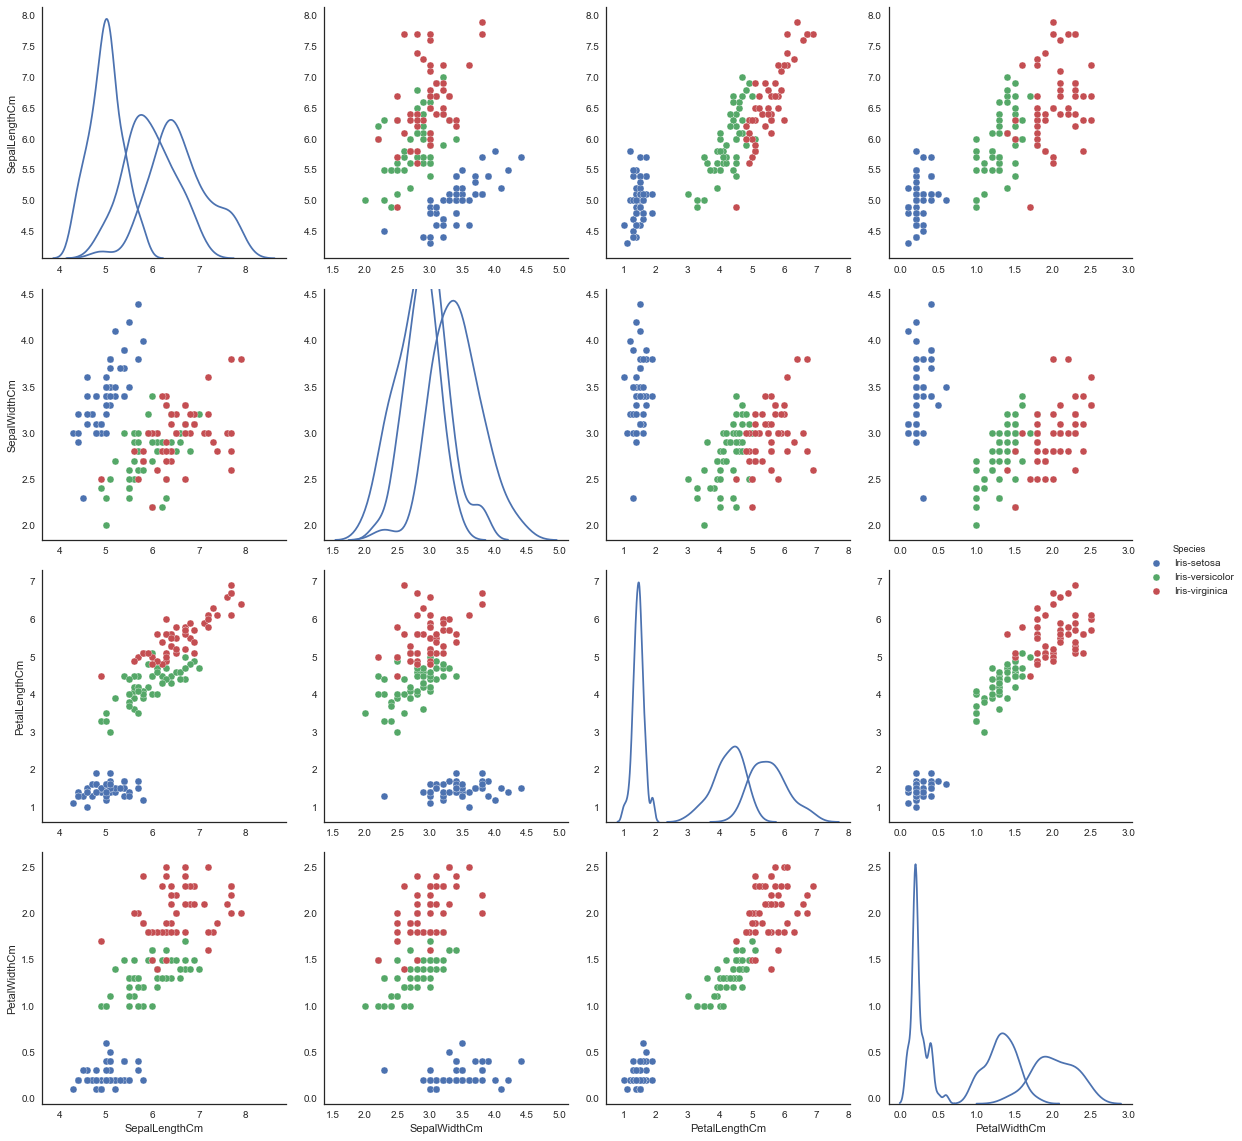

In [17]:
# We can change the histograms above to be KDEplot
sns.pairplot(iris.drop("Id", axis = 1), hue = "Species", size = 4, diag_kind = "kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000129D5568E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000129D61D1B70>]], dtype=object)

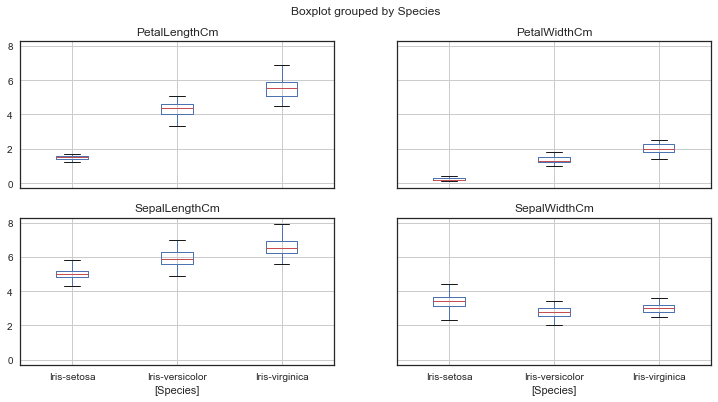

In [19]:
# Make a boxplot with pandas with each feature split out by species
iris.drop("Id", axis = 1).boxplot(by = "Species", figsize = (12,6))

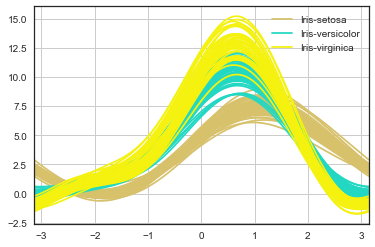

In [27]:
# Plot these on Andrews Curves, which uses attributes as coefficient for Fourier series.
# Curves belonging to samples of the same class will usually be closer together and form larger structure
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis = 1), "Species")

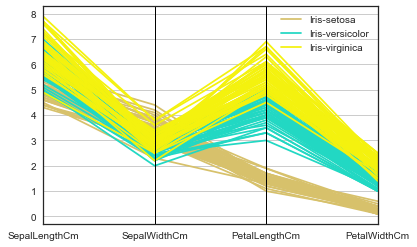

In [28]:
# Plot these on Parallel Coordinates to see clusters in data.
# Points are represented as line segments. Each vertical line represents one attribute.
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis = 1), "Species")

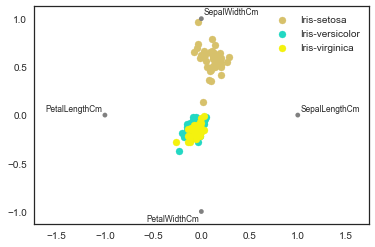

In [30]:
# Multivariate visualization technique pandas, radviz,which puts each feature as a point on a 2D plane.
# And then simulates having each sample attached to those points through a spring weighted by the relative value for that feature
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")